In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
dataset = pd.read_csv('dataset.csv')
symptom_precaution = pd.read_csv('symptom_precaution.csv')
symptom_severity = pd.read_csv('Symptom-severity.csv')
symptom_description = pd.read_csv('symptom_Description.csv')

In [4]:
symptom_cols = dataset.columns[1:]  # All columns except 'Disease'
X = dataset[symptom_cols].fillna('').agg(' '.join, axis=1)

# Define y (target): Disease labels
y = dataset['Disease']

# Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

In [5]:
# Assuming X and y are already prepared
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Tokenize the symptom text
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_length = 3
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')


In [7]:

model = Sequential([
    Embedding(max_words, 100, input_length=max_length),
    LSTM(128, return_sequences=True, kernel_regularizer=l2(0.0001)),
    Dropout(0.2),
    LSTM(64, kernel_regularizer=l2(0.0001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(len(np.unique(y)), activation='softmax', kernel_regularizer=l2(0.0001))
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=10, validation_split=0.2, batch_size=16)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/10


/Users/lakshmimounikab/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1442 - loss: 3.2889 - val_accuracy: 0.7284 - val_loss: 1.0666
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7418 - loss: 1.0093 - val_accuracy: 0.8338 - val_loss: 0.6328
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8330 - loss: 0.6093 - val_accuracy: 0.8553 - val_loss: 0.4642
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8547 - loss: 0.4611 - val_accuracy: 0.8553 - val_loss: 0.4262
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8511 - loss: 0.4182 - val_accuracy: 0.8579 - val_loss: 0.3835
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8652 - loss: 0.3848 - val_accuracy: 0.8617 - val_loss: 0.3556
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8701 - loss: 0.3491 - val_accuracy: 0.8642 - val_loss: 0.3517
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8673 - loss: 0.3457 - val_accuracy: 0.8629 - val_

In [8]:
# Build ANN model
model1 = Sequential([
    Embedding(input_dim=max_words, output_dim=100, input_length=max_length),
    Flatten(),  # Flatten the embedding layer output for ANN input
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),  # Hidden layer with L2 regularization
    Dropout(0.2),  # Dropout to prevent overfitting
    Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),  # Another hidden layer with L2 regularization
    Dropout(0.2),
    Dense(len(np.unique(y_train)), activation='softmax', kernel_regularizer=l2(0.0001))  # Output layer for classification
])

# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model1.fit(X_train_pad, y_train, epochs=10, validation_split=0.2, batch_size=16)

# Evaluate the model on the test set
test_loss, test_accuracy = model1.evaluate(X_test_pad, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3361 - loss: 3.0192 - val_accuracy: 0.8464 - val_loss: 0.5923
Epoch 2/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.8370 - loss: 0.5898 - val_accuracy: 0.8718 - val_loss: 0.3794
Epoch 3/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8778 - loss: 0.4007 - val_accuracy: 0.8782 - val_loss: 0.3337
Epoch 4/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.8603 - loss: 0.3987 - val_accuracy: 0.8756 - val_loss: 0.3305
Epoch 5/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8792 - loss: 0.3564 - val_accuracy: 0.8769 - val_loss: 0.3173
Epoch 6/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.8746 - loss: 0.3408 - val_accuracy: 0.8769 - val_loss: 0.3220
Epoch 7/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.8634 - loss: 0.3549 - val_accuracy: 0.8744 - val_loss: 0.3115
Epoch 8/10
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 856us/step - accuracy: 0.8746 - loss: 0.3318 - val_

In [9]:
# Build simple feed-forward network model
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(max_length,), kernel_regularizer=l2(0.0001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model2.fit(X_train_pad, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Evaluate the model
test_loss, test_accuracy = model2.evaluate(X_test_pad, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

Epoch 1/10


/Users/lakshmimounikab/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0408 - loss: 6.2591 - val_accuracy: 0.1523 - val_loss: 3.1787
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.1231 - loss: 3.3241 - val_accuracy: 0.2195 - val_loss: 2.8642
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.1611 - loss: 3.0717 - val_accuracy: 0.2652 - val_loss: 2.5874
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.2277 - loss: 2.7248 - val_accuracy: 0.3604 - val_loss: 2.3510
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.2724 - loss: 2.5144 - val_accuracy: 0.5051 - val_loss: 2.1668
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.3407 - loss: 2.3692 - val_accuracy: 0.4543 - val_loss: 2.0110
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.3612 - loss: 2.2695 - val_accuracy: 0.5901 - val_loss: 1.9059
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.4426 - loss: 2.0099 - val_accuracy: 0.5787 - val_lo

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step


/Users/lakshmimounikab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakshmimounikab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakshmimounikab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

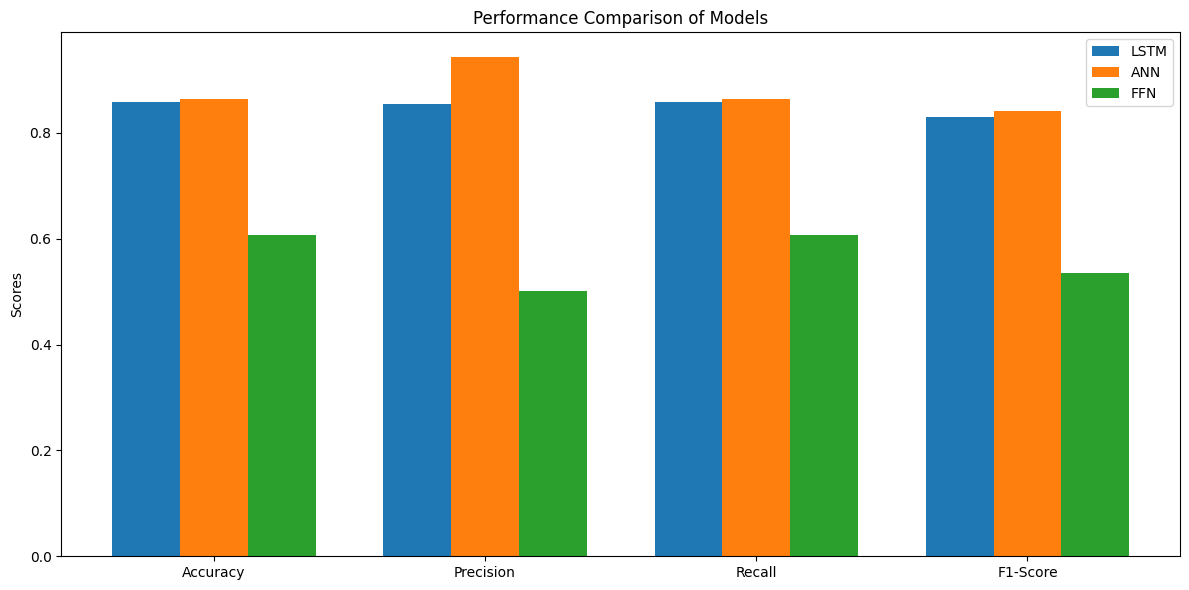

In [10]:
# Assuming you have already trained the models and have their predictions
y_pred_lstm = model.predict(X_test_pad).argmax(axis=1)
y_pred_ann = model1.predict(X_test_pad).argmax(axis=1)
y_pred_ffn = model2.predict(X_test_pad).argmax(axis=1)

# Calculate performance metrics
def get_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        'accuracy': report['accuracy'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score']
    }

metrics_lstm = get_metrics(y_test, y_pred_lstm)
metrics_ann = get_metrics(y_test, y_pred_ann)
metrics_ffn = get_metrics(y_test, y_pred_ffn)

# Plot comparative bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lstm_scores = [metrics_lstm[m.lower()] for m in metrics]
ann_scores = [metrics_ann[m.lower()] for m in metrics]
ffn_scores = [metrics_ffn[m.lower()] for m in metrics]

x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, lstm_scores, width, label='LSTM')
rects2 = ax.bar(x, ann_scores, width, label='ANN')
rects3 = ax.bar(x + width, ffn_scores, width, label='FFN')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()

/Users/lakshmimounikab/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/lakshmimounikab/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/lakshmimounikab/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/lakshmimounikab/anaconda3/lib/python3.11/site-packages/IPython/c

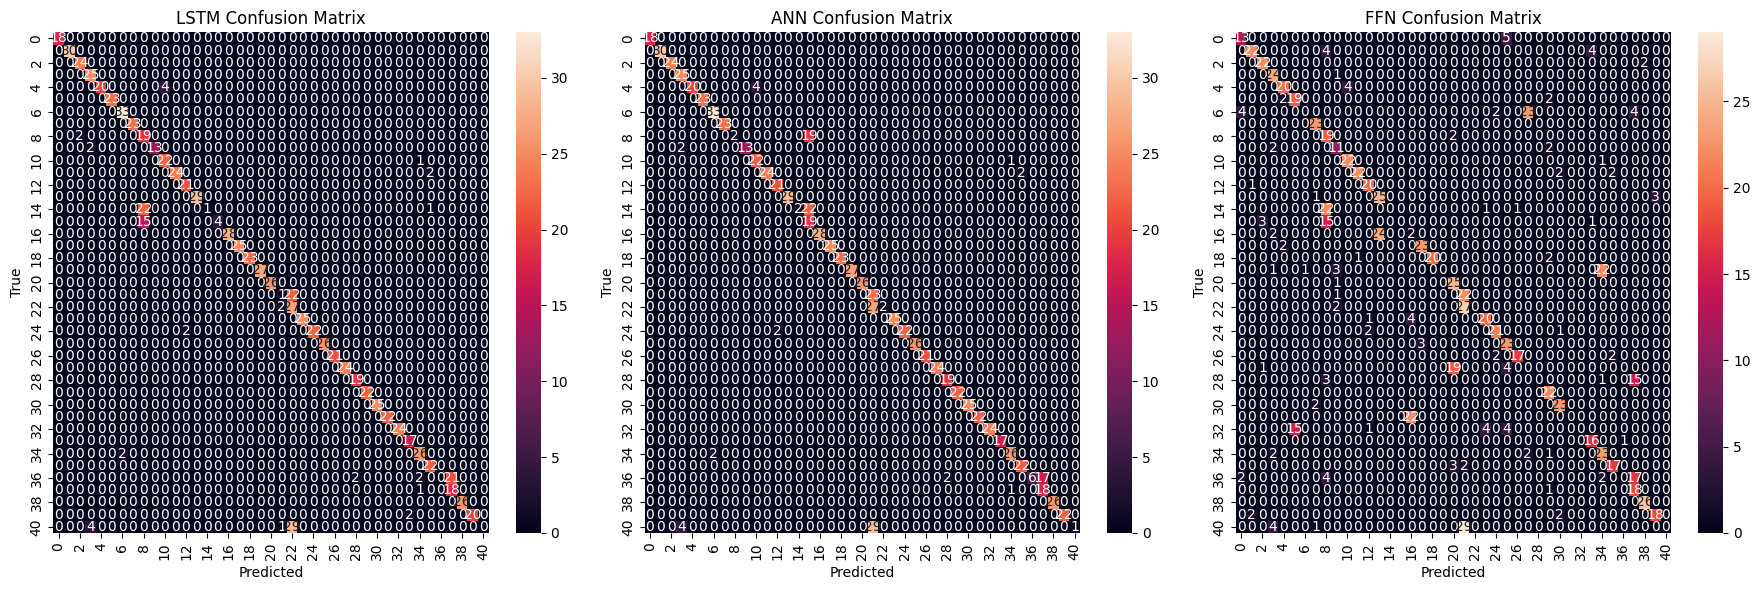

In [11]:
# Print confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_lstm), annot=True, fmt='d', ax=ax1)
ax1.set_title('LSTM Confusion Matrix')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')

sns.heatmap(confusion_matrix(y_test, y_pred_ann), annot=True, fmt='d', ax=ax2)
ax2.set_title('ANN Confusion Matrix')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')

sns.heatmap(confusion_matrix(y_test, y_pred_ffn), annot=True, fmt='d', ax=ax3)
ax3.set_title('FFN Confusion Matrix')
ax3.set_xlabel('Predicted')
ax3.set_ylabel('True')

plt.tight_layout()
plt.show()


In [12]:
# Print classification reports
print("LSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm))

print("\nANN Classification Report:")
print(classification_report(y_test, y_pred_ann))

print("\nFFN Classification Report:")
print(classification_report(y_test, y_pred_ffn))

LSTM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       0.92      1.00      0.96        24
           3       0.81      1.00      0.89        25
           4       1.00      0.83      0.91        24
           5       1.00      1.00      1.00        23
           6       0.94      1.00      0.97        33
           7       1.00      1.00      1.00        23
           8       0.34      0.90      0.49        21
           9       1.00      0.87      0.93        15
          10       0.85      0.96      0.90        23
          11       1.00      0.92      0.96        26
          12       0.91      1.00      0.95        21
          13       1.00      1.00      1.00        29
          14       1.00      0.04      0.08        24
          15       1.00      0.21      0.35        19
          16       1.00      1.00      1.00        28

/Users/lakshmimounikab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakshmimounikab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakshmimounikab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [13]:
from sklearn.metrics import roc_auc_score

# Assuming y_test is one-hot encoded and y_pred contains probabilities
# Convert `y_test` to one-hot if it is not
from sklearn.preprocessing import label_binarize

n_classes = len(np.unique(y_test))
y_test_onehot = label_binarize(y_test, classes=np.arange(n_classes))

# y_pred_probs should contain probabilities for each class (softmax output)
roc_auc_lstm = roc_auc_score(y_test_onehot, model.predict(X_test_pad), multi_class='ovr')
roc_auc_ann = roc_auc_score(y_test_onehot, model1.predict(X_test_pad), multi_class='ovr')
roc_auc_ffn = roc_auc_score(y_test_onehot, model2.predict(X_test_pad), multi_class='ovr')

print(f"ROC-AUC (LSTM): {roc_auc_lstm:.4f}")
print(f"ROC-AUC (ANN): {roc_auc_ann:.4f}")
print(f"ROC-AUC (FFN): {roc_auc_ffn:.4f}")

 1/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 318us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step
ROC-AUC (LSTM): 0.9955
ROC-AUC (ANN): 0.9960
ROC-AUC (FFN): 0.9606


In [14]:
import pandas as pd
from sklearn.metrics import roc_auc_score, classification_report

# Define a function to calculate performance metrics
def get_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        'accuracy': report['accuracy'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score']
    }

# Get the performance metrics for each model
metrics_lstm = get_metrics(y_test, y_pred_lstm)
metrics_ann = get_metrics(y_test, y_pred_ann)
metrics_ffn = get_metrics(y_test, y_pred_ffn)

# Calculate ROC-AUC for each model
roc_auc_lstm = roc_auc_score(y_test_onehot, model.predict(X_test_pad), multi_class='ovr')
roc_auc_ann = roc_auc_score(y_test_onehot, model1.predict(X_test_pad), multi_class='ovr')
roc_auc_ffn = roc_auc_score(y_test_onehot, model2.predict(X_test_pad), multi_class='ovr')

# Prepare the data for the DataFrame
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lstm_scores = [metrics_lstm[m.lower()] for m in metrics]
ann_scores = [metrics_ann[m.lower()] for m in metrics]
ffn_scores = [metrics_ffn[m.lower()] for m in metrics]

# Create a DataFrame with all the performance metrics including ROC-AUC values
metrics_df = pd.DataFrame({
    'Model': ['LSTM', 'ANN', 'FFN'],
    'Accuracy': [metrics_lstm['accuracy'], metrics_ann['accuracy'], metrics_ffn['accuracy']], 
    'Precision': [metrics_lstm['precision'], metrics_ann['precision'], metrics_ffn['precision']], 
    'Recall': [metrics_lstm['recall'], metrics_ann['recall'], metrics_ffn['recall']], 
    'F1-Score': [metrics_lstm['f1-score'], metrics_ann['f1-score'], metrics_ffn['f1-score']],
    'ROC-AUC': [roc_auc_lstm, roc_auc_ann, roc_auc_ffn]
})

# Display the dataframe
print(metrics_df)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step
  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  LSTM  0.858740   0.854446  0.858740  0.829811  0.995452
1   ANN  0.863821   0.942838  0.863821  0.842166  0.995979
2   FFN  0.607724   0.501113  0.607724  0.535714  0.960639


/Users/lakshmimounikab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakshmimounikab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lakshmimounikab/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 3, 100)         │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 3, 128)         │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 41)             │         1,353 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 810,269 (3.09 MB)

 Trainable params: 270,089 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 540,180 (2.06 MB)

In [18]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 3, 100)         │       100,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        38,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 41)             │         2,665 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 448,349 (1.71 MB)

 Trainable params: 149,449 (583.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 298,900 (1.14 MB)

In [19]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 41)             │         1,353 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,605 (142.99 KB)

 Trainable params: 12,201 (47.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 24,404 (95.33 KB)